# Exercice 4.

Dans cet exercice nous allons utiliser le jeu de données MINSTqui est composé de petites images de chiffres écrits à la main. L’étiquette associée à chaque image est le chiffre représenté. Nous allons utiliser l'ensemble de chiffres prétraité et intégré dans datasets de la bibliothèque Scikit-Learn (load_digits)

# Question 1
Lire et visualiser les données chiffres (digits) du dataset

In [3]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

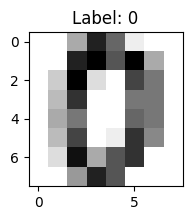

In [4]:
# Charger les données de chiffres
digits = load_digits()

# Afficher la première image
plt.figure(figsize=(2, 2))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Label: %i' % digits.target[0])
plt.show()

## Question 2

Les  données  obtenues  correspondent  à  des  images  8x8.  Donner  la  dimension  des données?  Utiliser  PCA  pour  visualizer  ces  données. Tracer  les  deux  composantes principales

Dimension des données :  (1797, 64)


C:\Users\Nathan\AppData\Local\Temp\ipykernel_1972\406334242.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Blues_r', 10))


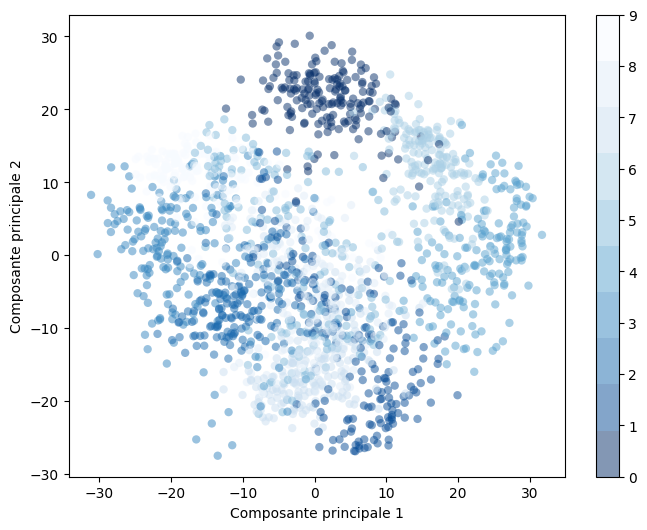

In [5]:
# Obtenir la dimension des données
data = digits.images.reshape((digits.images.shape[0], -1))
print("Dimension des données : ", data.shape)

# Appliquer l'ACP avec 2 composantes principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Créer un graphique pour les deux composantes principales
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Blues_r', 10))
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar()
plt.show()

## Question 3

Visualiser la reconstruction d’un chiffre en utilisant successivement: 1, 2, 3, 10, 20, 30, 50, 64 composantes principales. Interpréter.

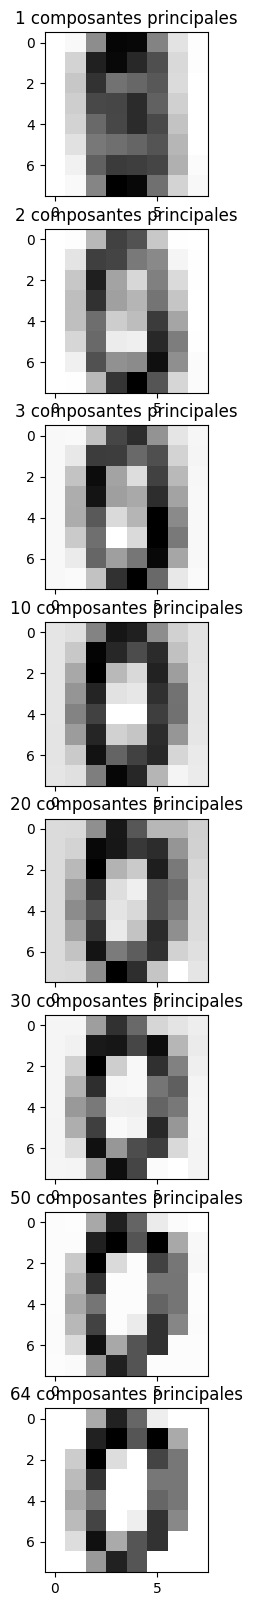

In [6]:
n_components = [1, 2, 3, 10, 20, 30, 50, 64]
images_reconstructed = []

# Appliquer l'ACP pour chaque nombre de composantes principales
for n in n_components:
    pca = PCA(n_components=n)
    X_transformed = pca.fit_transform(data)
    X_reconstructed = pca.inverse_transform(X_transformed)
    images_reconstructed.append(X_reconstructed)

# Visualiser la reconstruction d'un chiffre
plt.figure(figsize=(10, 20))
for i, images in enumerate(images_reconstructed):
    plt.subplot(len(n_components), 1, i + 1)
    plt.imshow(images[0].reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i composantes principales' % n_components[i])
plt.show()

Plus le nombre de composantes principales utilisées pour la reconstruction est élevé, plus l'image reconstruite ressemble à l'image originale. Cela est dû au fait que plus de composantes principales capturent plus d'information sur les données. Cependant, l'utilisation d'un grand nombre de composantes principales peut entraîner un surajustement.